### Project - Heart Disease Prediction using Logistic Regression 

The objective of this project is to predict the risk of Heart Disease among future patients, based on Clinical Data. The data has been retrieved from the below UCI repository. We will be using Logistic Regression algorithm for the same

https://archive.ics.uci.edu/dataset/45/heart+disease


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
heart = pd.read_csv('heart_disease.csv')

#### Feature Definitions in the below URL : 

https://archive.ics.uci.edu/dataset/45/heart+disease

In [3]:
### Exploring the data set

heart.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


In [5]:
### We can convert 'ca' and 'thal' to numeric data as they have numbers

heart['ca'] = heart['ca'].replace('?', np.NaN).astype(float)
heart['thal'] = heart['thal'].replace('?', np.NaN).astype(float)

#heart['thal'] = heart['thal'].astype(float)


print(heart['ca'].value_counts(dropna = False))
print(heart['thal'].value_counts(dropna = False))

0.0    176
1.0     65
2.0     38
3.0     20
NaN      4
Name: ca, dtype: int64
3.0    166
7.0    117
6.0     18
NaN      2
Name: thal, dtype: int64


In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          299 non-null    float64
 13  thal        301 non-null    float64
 14  present     303 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 35.6 KB


In [7]:
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_cols = ['sex', 'cp', 'fbs','restecg', 'exang', 'ca','thal']

agg_dict = {}

for col in num_cols:
    agg_dict[col] = 'mean'


In [8]:
heart.groupby('present').agg(agg_dict)

,age,trestbps,chol,thalach,oldpeak
present,,,,,
0,52.585366,129.250000,242.640244,158.378049,0.586585
1,56.625899,134.568345,251.474820,139.258993,1.574101


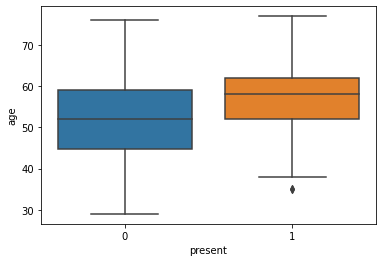

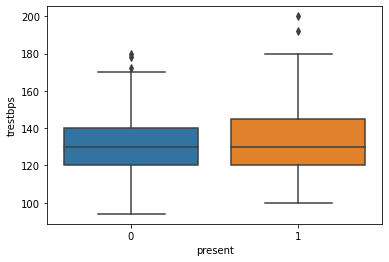

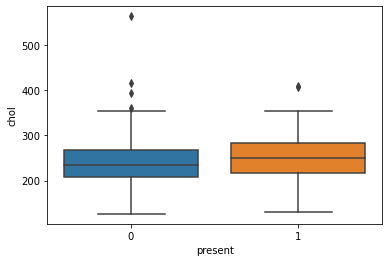

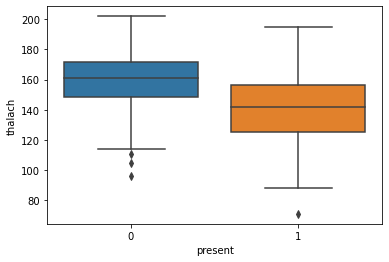

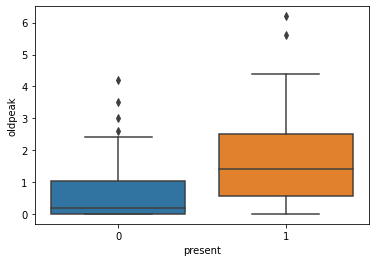

In [9]:
import seaborn as sns

#sns.boxplot(data = heart, x = 'present', y = 'age')

for col in num_cols:
    sns.boxplot(data = heart, x ='present', y = col)
    #plt.title(col)
    plt.show()

#### Upon observing the box plots and histograms, we can consider 'chol', 'age', 'thalach' and 'oldpeak' as features that are impacting the outcome. We will use chisquare test for categorical features

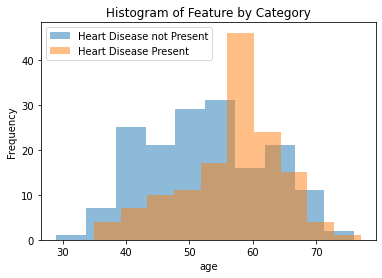

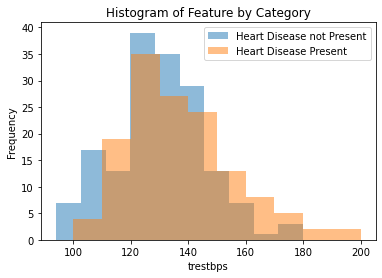

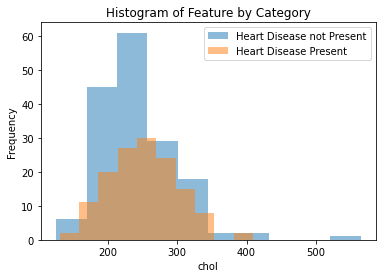

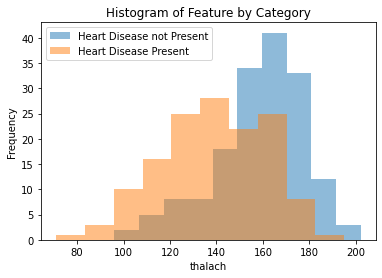

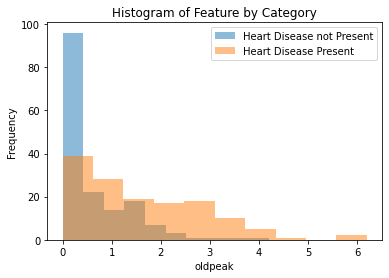

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a sample DataFrame

for col in num_cols:    

    df = heart

    # Split the data based on the categorical feature
    category_0 = df[df['present'] == 0]
    category_1 = df[df['present'] == 1]

    # Plot the histograms
    plt.hist(category_0[col], bins=10, alpha=0.5, label='Heart Disease not Present')
    plt.hist(category_1[col], bins=10, alpha=0.5, label='Heart Disease Present')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of Feature by Category')
    plt.legend()
    plt.show()


In [11]:
cross_tab = pd.crosstab(heart['sex'], heart['present'])

In [12]:
from scipy.stats import chi2_contingency

chisq_result = chi2_contingency(cross_tab)
print(chisq_result[1])

2.666712348180942e-06


In [13]:
cat_cols_selected = []
for col in cat_cols:
    cross_tab = pd.crosstab(heart[col], heart['present'])
    chisq_result = chi2_contingency(cross_tab)
    
    print(chisq_result[1], 'Categorical variable', col)
    if chisq_result[1] < 0.05:
        print('The relationship between', col,' and heart disease is significant')
        cat_cols_selected.append(col)
    else:
        print('The relationship between ', col, ' and heart disease is not signficant')
    
    print('\n')

    

2.666712348180942e-06 Categorical variable sex
The relationship between sex  and heart disease is significant


1.2517106007837527e-17 Categorical variable cp
The relationship between cp  and heart disease is significant


0.7812734067063785 Categorical variable fbs
The relationship between  fbs  and heart disease is not signficant


0.006566523814217354 Categorical variable restecg
The relationship between restecg  and heart disease is significant


1.413788096718085e-13 Categorical variable exang
The relationship between exang  and heart disease is significant


1.7199517696913475e-15 Categorical variable ca
The relationship between ca  and heart disease is significant


8.201820286056396e-19 Categorical variable thal
The relationship between thal  and heart disease is significant




In [14]:
print(cat_cols_selected)

['sex', 'cp', 'restecg', 'exang', 'ca', 'thal']


#### The categorical features selected are 'sex', 'cp', 'restecg' , 'exang', 'ca' and 'thal'

In [15]:
cols_selected = ['age', 'chol', 'thalach', 'oldpeak'] + cat_cols_selected 

In [16]:
cols_selected

['age',
 'chol',
 'thalach',
 'oldpeak',
 'sex',
 'cp',
 'restecg',
 'exang',
 'ca',
 'thal']

#### The features were selected as they had high correlations with the outcome variable. 'chol' which is an indicator of Cholestrol could have been excluded as the box plot didn't show significant impact, but it was selected basis domain knowledge. The categorical features were selected based on the Chi-square tests. Now we will proceed towards building the datasets for the model. 

In [17]:
X = heart[cols_selected]
y = heart['present']

In [18]:
X.shape

(303, 10)

In [19]:
y.shape

(303,)

In [20]:
X.isna().sum()

age        0
chol       0
thalach    0
oldpeak    0
sex        0
cp         0
restecg    0
exang      0
ca         4
thal       2
dtype: int64

In [21]:
X['ca'].value_counts(dropna = False)

0.0    176
1.0     65
2.0     38
3.0     20
NaN      4
Name: ca, dtype: int64

In [22]:
X['thal'].value_counts(dropna = False)

3.0    166
7.0    117
6.0     18
NaN      2
Name: thal, dtype: int64

#### Replacing the missing values with the most frequent values for both the features. (As they look numerical but are in fact, categorical indicators). 

In [23]:
X.loc[X['ca'].isnull(),'ca'] = 0.0

X['ca'].value_counts(dropna = False)


C:\Users\NageshN\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


0.0    180
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [24]:
X.loc[X['thal'].isnull(),'thal'] = 3.0

X['thal'].value_counts(dropna = False)


3.0    168
7.0    117
6.0     18
Name: thal, dtype: int64

### Dividing the Data (and ensuring class balance in both training and test sets)

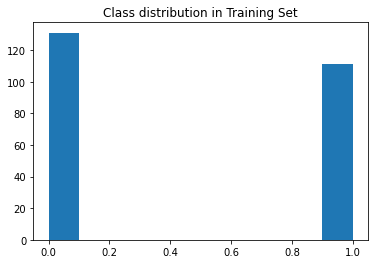

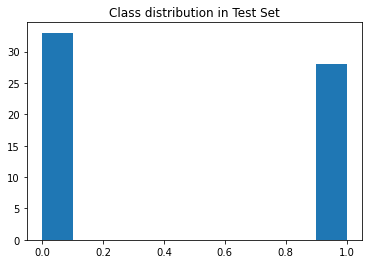

In [25]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 741)

plt.hist(y_train)
plt.title('Class distribution in Training Set')
plt.show()

plt.title('Class distribution in Test Set')
plt.hist(y_test)
plt.show()

In [26]:
# Checking the class distribution in the test set
unique, counts = np.unique(y_test, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution in Test Set:", class_distribution)

Class Distribution in Test Set: {0: 33, 1: 28}


### Building the Model

In [27]:
X_train.head()

,age,chol,thalach,oldpeak,sex,cp,restecg,exang,ca,thal
114,62,263,97,1.2,0,3,0,0,1.0,7.0
99,48,222,186,0.0,1,4,2,0,0.0,3.0
237,46,249,144,0.8,1,4,2,0,0.0,7.0
131,51,227,154,0.0,1,3,0,1,1.0,7.0
18,48,275,139,0.2,0,3,0,0,0.0,3.0


In [28]:
model = LogisticRegression()

model.fit(X_train, y_train)

predicted_classes = model.predict(X_test)
actual_classes = y_test


accuracy = model.score(X_test, y_test)

tp = sum((predicted_classes == 1) & (actual_classes == 1))
fn = sum((predicted_classes == 0) & (actual_classes == 1))

tn = sum((predicted_classes == 0) & (actual_classes == 0))
fp = sum((predicted_classes == 1) & (actual_classes == 1))

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print('The model accuracy is ', accuracy)
print('The model sensitivity is ', sensitivity)
print('The model specificity is ', specificity)

The model accuracy is  0.819672131147541
The model sensitivity is  0.8214285714285714
The model specificity is  0.54


C:\Users\NageshN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
### Increasing the number of iterations due to the error above

model = LogisticRegression(max_iter = 1000)

model.fit(X_train, y_train)

predicted_classes = model.predict(X_train)
actual_classes = y_train


accuracy = model.score(X_train, y_train)

tp = sum((predicted_classes == 1) & (actual_classes == 1))
fn = sum((predicted_classes == 0) & (actual_classes == 1))

tn = sum((predicted_classes == 0) & (actual_classes == 0))
fp = sum((predicted_classes == 1) & (actual_classes == 1))

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print('The model accuracy is ', accuracy)
print('The model sensitivity is ', sensitivity)
print('The model specificity is ', specificity)

The model accuracy is  0.8636363636363636
The model sensitivity is  0.8198198198198198
The model specificity is  0.5645933014354066


### Thus we can observe that the overall model accuracy is 86%. The sensitivity is 0.82 but the specificity is 0.56. Thus we can say that the model would predict positive cases with a higher accuracy in comparision to the negative cases. 

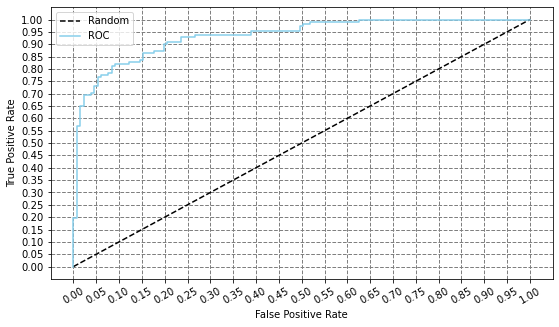

In [30]:
predicted_probabilities = model.predict_proba(X_train)[:,1]

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, predicted_probabilities)

plt.figure(figsize=(9,5))
plt.plot([0,1], [0,1], 'k--', label = 'Random')
plt.plot(fpr,tpr,color = 'skyblue', label = 'ROC')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xticks(ticks = np.arange(0, 1.01, 0.05), rotation = 30)
plt.yticks(ticks = np.arange(0, 1.01, 0.05))


plt.grid(True, linestyle='--', linewidth=1, color='gray')


plt.legend(fontsize=10, loc='best')
plt.show()

In [31]:
tpr_greater_than_point_8 = np.where(tpr > 0.8)

In [32]:
tpr_greater_than_point_8

(array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], dtype=int64),)

In [33]:
tpr[20:]

array([0.81081081, 0.81081081, 0.81981982, 0.81981982, 0.82882883,
       0.82882883, 0.83783784, 0.83783784, 0.86486486, 0.86486486,
       0.87387387, 0.87387387, 0.9009009 , 0.9009009 , 0.90990991,
       0.90990991, 0.92792793, 0.92792793, 0.93693694, 0.93693694,
       0.95495495, 0.95495495, 0.97297297, 0.97297297, 0.98198198,
       0.98198198, 0.99099099, 0.99099099, 1.        , 1.        ])

In [34]:
fpr[20:]
# The FPR increases beyond index 12. Hence we will choose the corresponding threshold

array([0.08396947, 0.09160305, 0.09160305, 0.1221374 , 0.1221374 ,
       0.14503817, 0.14503817, 0.15267176, 0.15267176, 0.17557252,
       0.17557252, 0.19847328, 0.19847328, 0.20610687, 0.20610687,
       0.23664122, 0.23664122, 0.26717557, 0.26717557, 0.38931298,
       0.38931298, 0.49618321, 0.49618321, 0.50381679, 0.50381679,
       0.51908397, 0.51908397, 0.6259542 , 0.6259542 , 1.        ])

In [35]:
thresholds[20]

0.541024069698533

#### Thus at threshold 0.54, our Logistic Regression model will give a better result. We will update model results using this threshold and test the various metrics. 

In [36]:
model = LogisticRegression(max_iter = 1000)

model.fit(X_train, y_train)

new_threshold = thresholds[20]

predicted_probabilities = model.predict_proba(X_train)[:, 1]
predicted_classes = (predicted_probabilities > new_threshold).astype(int)

actual_classes = y_train


accuracy = model.score(X_train, y_train)

tp = sum((predicted_classes == 1) & (actual_classes == 1))
fn = sum((predicted_classes == 0) & (actual_classes == 1))

tn = sum((predicted_classes == 0) & (actual_classes == 0))
fp = sum((predicted_classes == 1) & (actual_classes == 1))

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print('The model accuracy is ', accuracy)
print('The model sensitivity is ', sensitivity)
print('The model specificity is ', specificity)

The model accuracy is  0.8636363636363636
The model sensitivity is  0.8018018018018018
The model specificity is  0.5741626794258373


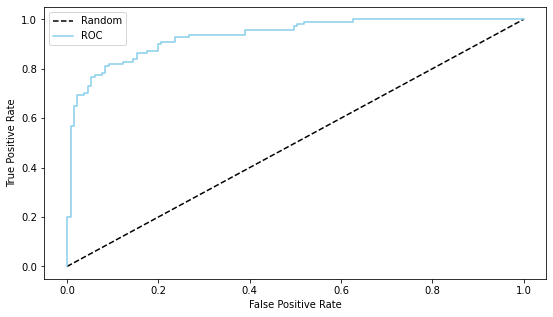

In [37]:
fpr, tpr, thresholds = roc_curve(y_train, predicted_probabilities)

plt.figure(figsize=(9,5))
plt.plot([0,1], [0,1], 'k--', label = 'Random')
plt.plot(fpr,tpr,color = 'skyblue', label = 'ROC')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(fontsize=10, loc='best')
plt.show()

#### Thus, the model's specificity goes up by 0.01 but sensitivity comes down by 0.01. The overall accuracy remains the same. The model's sensitivity is 0.801 which is still close to 0.8. Thus we have not lost a lot of sensitivity. Hence we would use the updated model with the threshold of 0.54. 

### Interpreting the Model Coefficients

In [38]:
model.coef_

array([[-0.00937168,  0.0041903 , -0.02612934,  0.46278086,  1.29669783,
         0.54224299,  0.19402076,  0.61324289,  1.19140259,  0.44678808]])

In [39]:
list_model_coef = [round(coef,4) for coef in model.coef_[0]]

In [40]:
list_model_coef

[-0.0094,
 0.0042,
 -0.0261,
 0.4628,
 1.2967,
 0.5422,
 0.194,
 0.6132,
 1.1914,
 0.4468]

In [41]:
cols_selected

['age',
 'chol',
 'thalach',
 'oldpeak',
 'sex',
 'cp',
 'restecg',
 'exang',
 'ca',
 'thal']

In [42]:
cols_coef_zipped = list(zip(cols_selected,list_model_coef))    

In [43]:
print(cols_coef_zipped)

[('age', -0.0094), ('chol', 0.0042), ('thalach', -0.0261), ('oldpeak', 0.4628), ('sex', 1.2967), ('cp', 0.5422), ('restecg', 0.194), ('exang', 0.6132), ('ca', 1.1914), ('thal', 0.4468)]


In [44]:
for i in cols_coef_zipped:
 
    if i[1] >1 and i[0] in num_cols:
        print('For a unit increase in {a}, the Log of Odds  increases by {b}'.format(a = i[0], b = i[1]))
    elif i[1] <1 and i[0] in num_cols:
        print('For a unit increase in {a}, the Log of Odds  decreases by {b}'.format(a = i[0], b = i[1]))

    elif i[1] >1 and i[0] in cat_cols:
        print('For a unit change in the type of {a} , the Log Odds of the patient having a heart diseasse increases by {b}'.format(a = i[0], b = i[1]))
        #print('The catgories for cp are  1: typical angina  2: atypical angina , 3: non-anginal pain, 4: asymptomatic')
    elif i[1] <1 and i[0] in cat_cols:
        print('For a unit change in the type of {a} , the Log Odds of the patient having a heart diseasse decreases by {b}'.format(a = i[0], b = i[1]))   



For a unit increase in age, the Log of Odds  decreases by -0.0094
For a unit increase in chol, the Log of Odds  decreases by 0.0042
For a unit increase in thalach, the Log of Odds  decreases by -0.0261
For a unit increase in oldpeak, the Log of Odds  decreases by 0.4628
For a unit change in the type of sex , the Log Odds of the patient having a heart diseasse increases by 1.2967
For a unit change in the type of cp , the Log Odds of the patient having a heart diseasse decreases by 0.5422
For a unit change in the type of restecg , the Log Odds of the patient having a heart diseasse decreases by 0.194
For a unit change in the type of exang , the Log Odds of the patient having a heart diseasse decreases by 0.6132
For a unit change in the type of ca , the Log Odds of the patient having a heart diseasse increases by 1.1914
For a unit change in the type of thal , the Log Odds of the patient having a heart diseasse decreases by 0.4468


In [45]:
exp_list_model_coef = [round(np.exp(coef),3) for coef in list_model_coef]
exp_list_model_coef

[0.991, 1.004, 0.974, 1.589, 3.657, 1.72, 1.214, 1.846, 3.292, 1.563]

In [46]:
cols_exp_coef_zipped = list(zip(cols_selected, exp_list_model_coef))
cols_exp_coef_zipped

[('age', 0.991),
 ('chol', 1.004),
 ('thalach', 0.974),
 ('oldpeak', 1.589),
 ('sex', 3.657),
 ('cp', 1.72),
 ('restecg', 1.214),
 ('exang', 1.846),
 ('ca', 3.292),
 ('thal', 1.563)]

In [47]:
for i in cols_exp_coef_zipped:
    if i[1] >1 and i[0] in num_cols:
        print('For a unit increase in {a}, the Odds of the patient having a heart disease increases by {b} times'.format(a = i[0], b = i[1]))
    elif i[1] <1 and i[0] in num_cols:
        print('For a unit increase in {a}, the Odds of the patient having a heart disease decreases by {b:.2%}'.format(a = i[0], b = (round(1- i[1],3))))
        
    
    
    elif i[1] >1 and i[0] in cat_cols:
        print('If the categorical variable {a} changes by 1 unit(category), the Odds of the patient having a heart disease increases by {b} times'.format(a = i[0], b = i[1]))
    elif i[1] <1 and i[0] in cat_cols:
        print('If the categorical variable {a} changes by 1 unit(category), the Odds of the patient having a heart disease decreases by {b:.2%}'.format(a = i[0], b = (round(1- i[1],3))))   
        
        
        


For a unit increase in age, the Odds of the patient having a heart disease decreases by 0.90%
For a unit increase in chol, the Odds of the patient having a heart disease increases by 1.004 times
For a unit increase in thalach, the Odds of the patient having a heart disease decreases by 2.60%
For a unit increase in oldpeak, the Odds of the patient having a heart disease increases by 1.589 times
If the categorical variable sex changes by 1 unit(category), the Odds of the patient having a heart disease increases by 3.657 times
If the categorical variable cp changes by 1 unit(category), the Odds of the patient having a heart disease increases by 1.72 times
If the categorical variable restecg changes by 1 unit(category), the Odds of the patient having a heart disease increases by 1.214 times
If the categorical variable exang changes by 1 unit(category), the Odds of the patient having a heart disease increases by 1.846 times
If the categorical variable ca changes by 1 unit(category), the Odd

#### The impact of the features on the risk of heart disease is as follows (please assume that the other factors are kept constant when describing the impact of one feature) : 

1. For increase in age by 1 year, the the Odds of the patient having a heart disease decreases by 0.90%. This goes against common knowledge that older people are at a greater risk of heart disease. It could be due to other lifestyle factors corresponding to old age, rather than age alone. 

2. For an increase of 1 mg / dL in Cholestrol levels, the the Odds of the patient having a heart disease increases by a factor of 1.004 . 

3. For a unit increase in Maximum Heart Rate achieved, the Odds of the patient having a heart disease decreases by 2.60%. This can be understood as more active people have higher heart rates and thus are at a lower risk of heart disease. 

4. For a unit increase in ST Depression (a part of ECG reading), the Odds of the patient having a heart disease increases by a factor of 1.589 . Ref. on ST Depression https://en.wikipedia.org/wiki/ST_depression

5. If the patient is male, the Odds of the patient having a heart disease increases by a factor of 3.657 . 

6. If the chest pain type increases by  1 level, the Odds of the patient having a heart disease increases by a factor of 1.72 .
   The four levels of chest pain are mentioned below

        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
        
7. If the rest ECG values increase by 1 level, the Odds of the patient having a heart disease increases by a factor of 1.214  or 21.4%
   The three levels of rest ECG are mentioned below 
   
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
        
8. If the patient has Exercise Induced Angina (chest pain), the Odds of the patient having a heart disease increases by a factor of 1.846 

9. For increase of every 1 unit in the number of major vessels colored by flourosopy, the Odds of the patient having a heart disease increases by a factor of 3.292 . This factor ranges from 0-3.

10. For increase of every one level of the Thalium stress test result (which indicates blood flow to the muscles),  the Odds of the patient having a heart disease increases by a factor of 1.563 . The three levels in the test are : 
         -- 3 = normal; 
         -- 6 = fixed defect; 
         -- 7 = reversable defect


### Final Model Evaluation

In [48]:
### We will use the updated threshold of 0.54.

predicted_probabilities = model.predict_proba(X_test)[:, 1]
predicted_classes = (predicted_probabilities > new_threshold).astype(int)

actual_classes = y_test


accuracy = model.score(X_test, y_test)

tp = sum((predicted_classes == 1) & (actual_classes == 1))
fn = sum((predicted_classes == 0) & (actual_classes == 1))

tn = sum((predicted_classes == 0) & (actual_classes == 0))
fp = sum((predicted_classes == 1) & (actual_classes == 1))

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print('The model accuracy is ', accuracy)
print('The model sensitivity is ', sensitivity)
print('The model specificity is ', specificity)

The model accuracy is  0.8032786885245902
The model sensitivity is  0.8214285714285714
The model specificity is  0.54


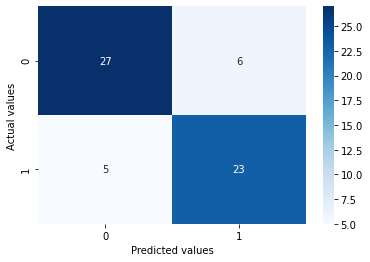

In [49]:
cm = confusion_matrix(y_test, predicted_classes)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()


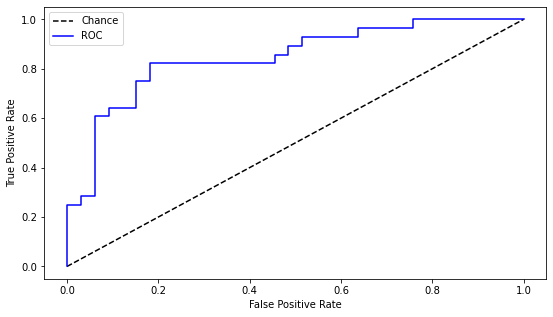

In [50]:
predicted_probabilities = model.predict_proba(X_test)[:,1]

fpr,tpr,thresholds = roc_curve(y_test, predicted_probabilities)

plt.figure(figsize = (9,5))

plt.plot([0,1], [0,1], 'k--', label = 'Chance')
plt.plot(fpr, tpr, color = 'blue', label = 'ROC')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

### Conclusions - 

1. Overall, the model makes sense based on our knowledge of the predictors. One factor, which seemed counterintuitive was 'Age' and we can conclude that 'Age' is a proxy for other lifestyle related factors.

2. The model seems to predict cases (presence of heart disease) better than non-cases (0.82 vs 0.54). The overall accuracy is 80.3% which means that it predicts correctly about 80% of the time. 

3. While the accuracy is relatively high, this may not be suitable in Clinical settings where we cannnot have high false positive rates (close to 46%). Still we can use this model as a screening tool to segregate patients at a high risk of heart disease and may require further evaluation. 